In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

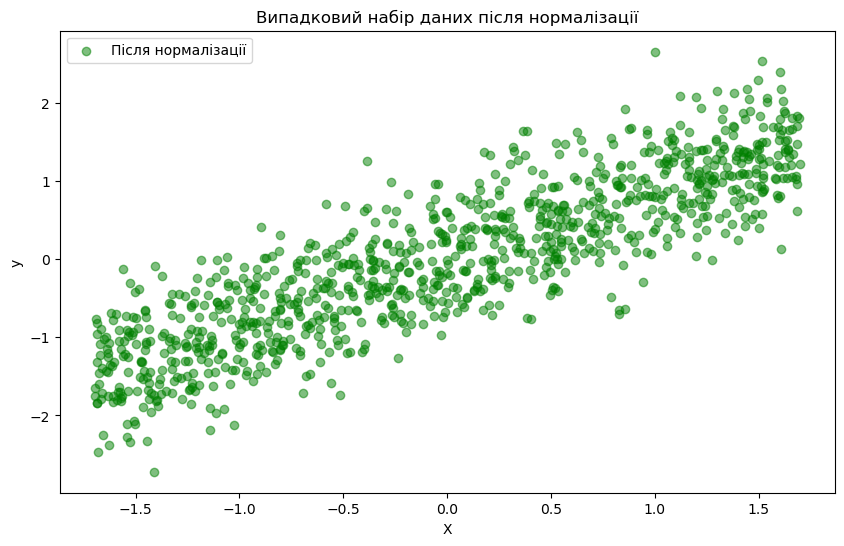

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Згенерувати випадковий набір даних

X = np.random.rand(1000, 1) * 1000
y = X.squeeze() + np.random.randn(1000) * 175

# Нормалізація даних
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).squeeze()

# Візуалізація згенерованих даних після нормалізації
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y_scaled, color='green', alpha=0.5, label='Після нормалізації')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Випадковий набір даних після нормалізації')
plt.legend()
plt.show()

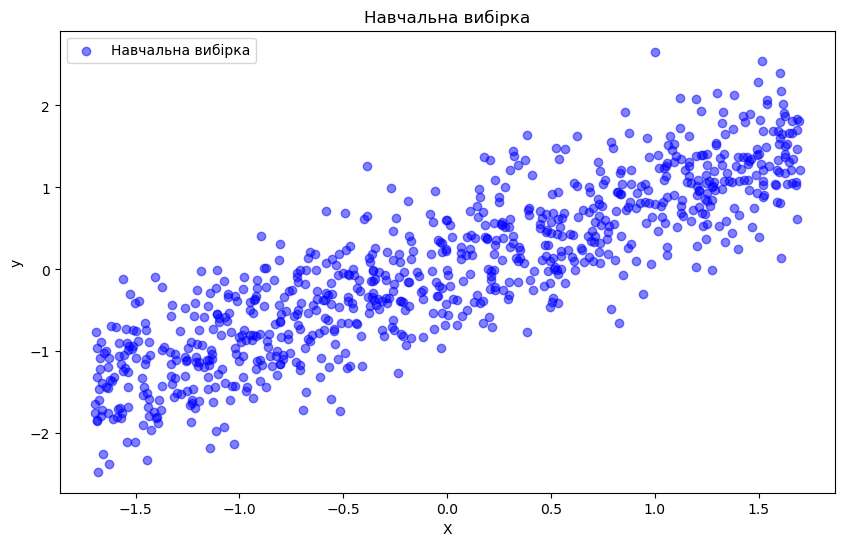

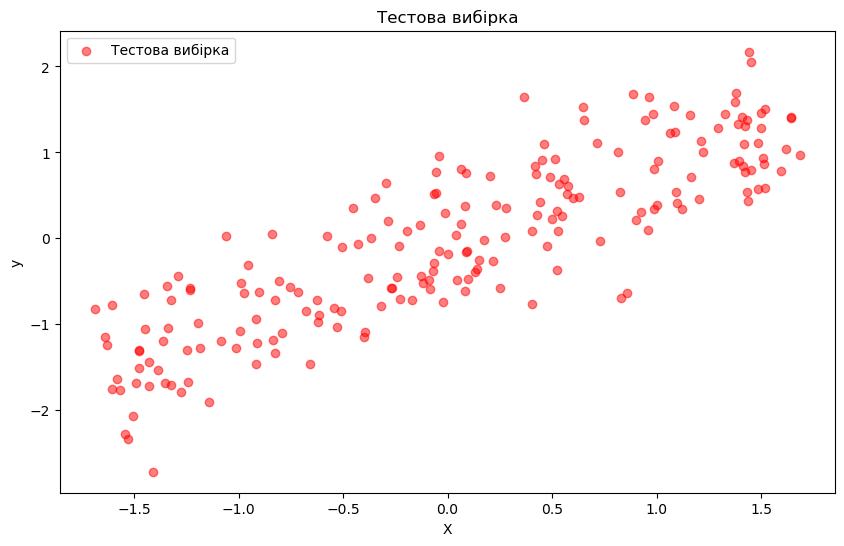

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Розділити на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Візуалізація навчальної вибірки
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Навчальна вибірка')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Навчальна вибірка')
plt.legend()
plt.show()

# Візуалізація тестової вибірки
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Тестова вибірка')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Тестова вибірка')
plt.legend()
plt.show()

In [4]:
# Визначення діапазону значень K
k_values = range(1, 21)
mse_values = []

# Цикл значень K
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Створення DataFrame для виводу даних
results = pd.DataFrame({'K': k_values, 'MSE': mse_values})
print(results)
best_k = k_values[np.argmin(mse_values)]
print(f'Найкраще значення K: {best_k}')

     K       MSE
0    1  0.664548
1    2  0.434635
2    3  0.373728
3    4  0.357120
4    5  0.324601
5    6  0.316624
6    7  0.311798
7    8  0.307501
8    9  0.305225
9   10  0.301679
10  11  0.298606
11  12  0.298486
12  13  0.297082
13  14  0.299942
14  15  0.295352
15  16  0.294170
16  17  0.292360
17  18  0.290199
18  19  0.290289
19  20  0.290379
Найкраще значення K: 18


In [5]:
best_k = k_values[np.argmin(mse_values)]
print(f'Найкраще значення К: {best_k}')

Найкраще значення К: 18


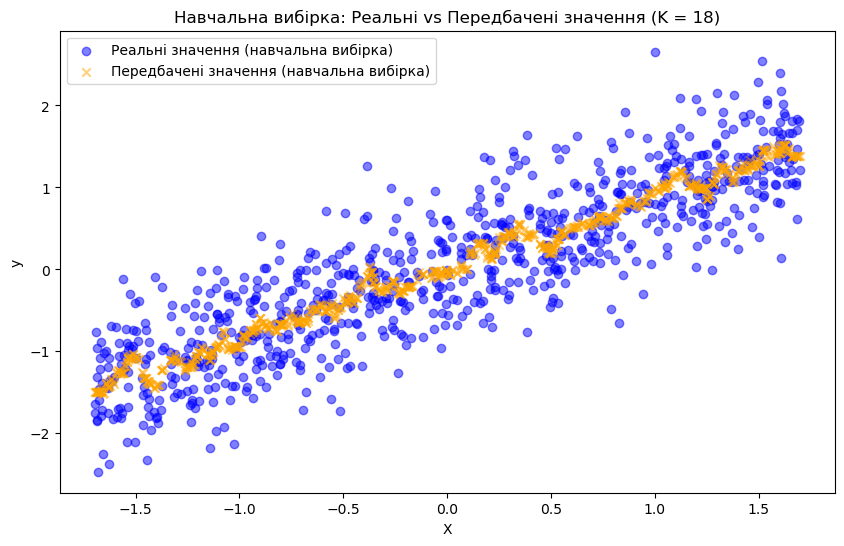

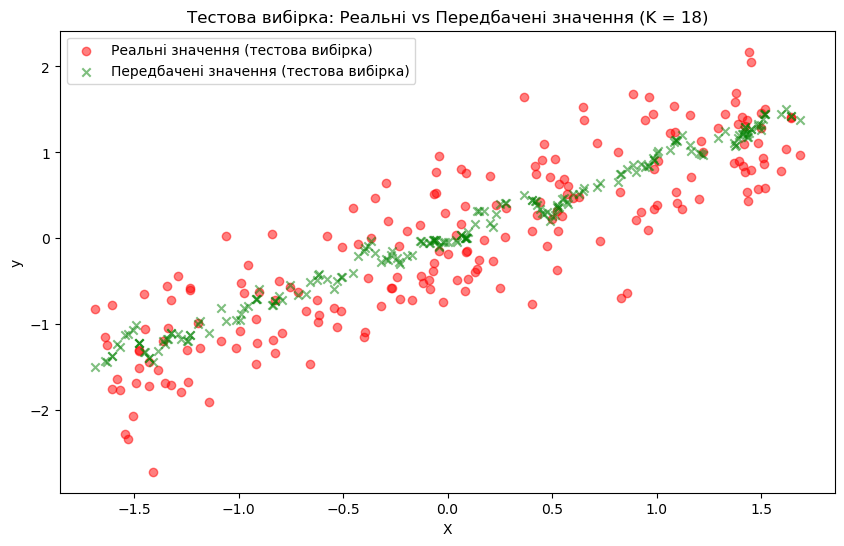

In [6]:
# Навчання моделі з найкращим K
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Прогноз на навчальній і тестовій вибірці
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

# Візуалізація реальних та передбачених значень на навчальній вибірці
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Реальні значення (навчальна вибірка)')
plt.scatter(X_train, y_train_pred, color='orange', alpha=0.5, label='Передбачені значення (навчальна вибірка)', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Навчальна вибірка: Реальні vs Передбачені значення (K = {best_k})')
plt.legend()
plt.show()

# Візуалізація реальних та передбачених значень на тестовій вибірці
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Реальні значення (тестова вибірка)')
plt.scatter(X_test, y_test_pred, color='green', alpha=0.5, label='Передбачені значення (тестова вибірка)', marker='x')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Тестова вибірка: Реальні vs Передбачені значення (K = {best_k})')
plt.legend()
plt.show()
